In [2]:
# AI for Weather runtime
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import typing as t
from IPython.display import Image
from colabtools import adhoc_import
with adhoc_import.Google3CitcClient('wb2-viz', username='srasp'):
  import weatherbench2 as wb2
  from weatherbench2 import config
  config = adhoc_import.Reload(config)
  from weatherbench2.config import VizConfig, PanelConfig
  from weatherbench2 import visualization
  from weatherbench2.visualization import *
  visualization = adhoc_import.Reload(visualization)
  from weatherbench2.utils import *
  from weatherbench2.metrics import get_lat_weights

In [3]:
c = sns.color_palette('tab10', 6)
c

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

In [4]:
colors = list(c.as_hex())
colors

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

In [5]:
blue, yellow, green, red, purple, brown = colors

In [6]:
# blue = '#0173b2'
# yellow = '#de8f05'
# green = '#029e73'
# red = '#d55e00'
# purple = '#cc78bc'
# brown = '#ca9161'

In [7]:
SAVE_PATH = '/x20/teams/aiforweather/paper_figures/'

In [8]:
def get_viz_config(models):
  RESULTS_DIR = '/cns/od-d/home/attractor/weatherbench/results/240x121/deterministic/'

  model_paths = {
      'hres_vs_analysis': (
          f'{RESULTS_DIR}/hres_vs_analysis_2020_deterministic.nc'
      ),
      'hres_vs_era': f'{RESULTS_DIR}/hres_vs_era_2020_deterministic.nc',
      'ens_mean_vs_analysis': (
          f'{RESULTS_DIR}/ens_vs_analysis_2020_deterministic.nc'
      ),
      'ens_mean_vs_era': f'{RESULTS_DIR}/ens_vs_era_2020_deterministic.nc',
      'climatology_vs_era': (
          f'{RESULTS_DIR}/climatology_vs_era_2020_deterministic.nc'
      ),
      'persistence_vs_era': (
          f'{RESULTS_DIR}/persistence_vs_era_2020_deterministic.nc'
      ),
      # 'neuralgcm_vs_era': (
      #     f'{RESULTS_DIR}/neuralgcm_vs_era_2020_deterministic.nc'
      # ),
      'graphcast_vs_era': (
          f'{RESULTS_DIR}/graphcast_vs_era_2020_deterministic.nc'
      ),
      'pangu_vs_era': f'{RESULTS_DIR}/pangu_vs_era_2020_deterministic.nc',
      'keisler_vs_era': f'{RESULTS_DIR}/keisler_vs_era_2020_deterministic.nc',
      'era5-forecasts_vs_era': f'{RESULTS_DIR}/era5-forecasts_vs_era_2020_deterministic.nc',
  }

  regions = ['global']

  viz_config = VizConfig(
      results={model: model_paths[model] for model in models},
      colors={
          'hres_vs_analysis': blue,
          'hres_vs_era': blue,
          'ens_mean_vs_analysis': green,
          'ens_mean_vs_era': green,
          # 'neuralgcm_vs_era': red,
          'graphcast_vs_era': red,
          # 'neuralgcm_vs_analysis': 'lightred',
          'climatology_vs_era': '0.3',
          'persistence_vs_era': '0.7',
          'ens_vs_analysis': green,
          'pangu_vs_era': purple,
          'keisler_vs_era': brown,
          'era5-forecasts_vs_era': yellow,
      },
      linestyles={
          'hres_vs_analysis': '-',
          'hres_vs_era': '--',
          'ens_mean_vs_analysis': '-',
          'ens_mean_vs_era': '--',
          # 'hres_pp_vs_era': 'lightgreen',
          # 'hres_pp_vs_analysis': 'green',
          'neuralgcm_vs_era': '-',
          'graphcast_vs_era': '-',
          # 'neuralgcm_vs_analysis': 'lightred',
          'climatology_vs_era': '-',
          'persistence_vs_era': '-',
          'ens_vs_analysis': '-',
          'pangu_vs_era': '-',
          'era5-forecasts_vs_era': '-',
          'keisler_vs_era': '-',
      },
      layout=(4, 2),
      figsize=(10, 12),
      labels={
          'hres_vs_era': 'IFS HRES vs ERA5',
          'hres_vs_analysis': 'IFS HRES vs Analysis',
          'ens_mean_vs_analysis': 'IFS ENS (mean) vs Analysis',
          'ens_mean_vs_era': 'IFS ENS (mean) vs ERA5',
          'hres_pp_vs_era': 'PP HRES vs ERA5',
          'hres_pp_vs_analysis': 'PP HRES vs Analysis',
          'neuralgcm_vs_era': 'NeuralGCM vs ERA5',
          'graphcast_vs_era': 'GraphCast vs ERA5',
          'neuralgcm_vs_analysis': 'NeuralGCM vs Analysis',
          'climatology_vs_era': 'Climatology vs ERA5',
          'persistence_vs_era': 'Persistence vs ERA5',
          'ens_vs_analysis': 'IFS ENS vs Analysis',
          'pangu_vs_era': 'Pangu-Weather vs ERA5',
          'keisler_vs_era': 'Keisler (2022) vs ERA5',
          'era5-forecasts_vs_era': 'ERA5-Forecasts vs ERA5',
      },
      save_kwargs={'dpi': 300}
  )
  return viz_config

In [9]:
plt.rcParams['figure.facecolor'] = 'None'
set_wb2_style()

# Deterministic figures

In [52]:
models = ['climatology_vs_era', 'persistence_vs_era',
          'hres_vs_analysis', 'hres_vs_era', 'ens_mean_vs_analysis', 'ens_mean_vs_era', 
          'era5-forecasts_vs_era',
          'keisler_vs_era','pangu_vs_era', 
          'graphcast_vs_era'
          ]
regions = ['global']
viz_config = get_viz_config(models)

In [11]:
results = load_results(viz_config.results)

In [12]:
# Substitute precipitation
new = results['hres_vs_analysis']
for tp in ['total_precipitation_6hr', 'total_precipitation_24hr']:
  new[tp] = results['hres_vs_era'][tp]
results['hres_vs_analysis'] = new

new = results['ens_mean_vs_analysis']
for tp in ['total_precipitation_6hr', 'total_precipitation_24hr']:
  new[tp] = results['ens_mean_vs_era'][tp]
results['ens_mean_vs_analysis'] = new

del results['hres_vs_era']
del results['ens_mean_vs_era']

viz_config.results = results

In [13]:
def plot_headline_scores(
      metric: str, relative: bool, regions: t.Sequence[str], ylims, save_path=None,
      legend_position=2
  ):
    variables = [
        ('geopotential', 500),
        ('temperature', 850),
        ('specific_humidity', 700),
        ('wind_vector' if metric == 'rmse' else 'wind_speed', 850),
        ('2m_temperature', None),
        ('mean_sea_level_pressure', None),
        ('10m_wind_speed', None),
        ('total_precipitation_24hr', None),
    ]
    
    for region in regions:
      plot_configs = []
      for variable, level in variables:
        if relative:
          ylabel = '% relative to IFS HRES'
        elif metric == 'acc':
          ylabel = 'ACC'
        elif metric == 'rms_bias':
          ylabel = f'RMS Bias [{units[variable]}]'
        else:
          ylabel = f'{metric.upper()} [{units[variable]}]'

        plot_configs.append(
            PanelConfig(
                metric=metric,
                variable=variable,
                level=level,
                region=region,
                relative='hres_vs_analysis' if relative else None,
                ylabel=ylabel,
                xlabel='Lead time [days]',
                title=(
                    f'{long2short[variable]}{level if level else ""}'
                ),
                ylim=ylims[variable],
                xlim=(0, int(np.timedelta64(10, 'D').astype('timedelta64[ns]')))
            )
        )

      visualize_timeseries(
          viz_config,
          plot_configs,
          save_path=save_path,
          subplots_adjust_kwargs={'left': 0.08, 'right': 0.98, 'bottom': 0.05, 'top': 0.96, 'hspace': 0.3},
          legend_position=legend_position,
      )

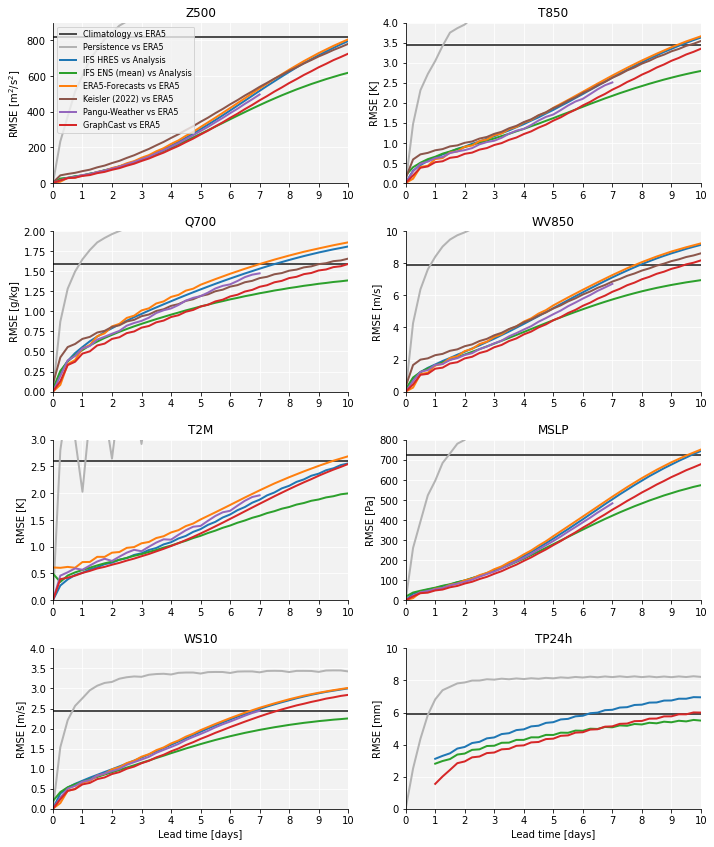

In [14]:
ylims = {
    'geopotential': (0, 900),
    'temperature': (0, 4),
    'specific_humidity': (0, 2),
    'wind_vector': (0, 10),
    '2m_temperature': (0, 3),
    'mean_sea_level_pressure': (0, 800),
    '10m_wind_speed': (0, 4.),
    'total_precipitation_24hr': (0, 0.01*1000),
}
plot_headline_scores('rmse', relative=False, regions=regions, ylims=ylims)

In [15]:
ylims = {
    'geopotential': (0, 900),
    'temperature': (0, 4),
    'specific_humidity': (0, 2),
    'wind_vector': (0, 10),
    '2m_temperature': (0, 3),
    'mean_sea_level_pressure': (0, 800),
    '10m_wind_speed': (0, 4),
    'total_precipitation_24hr': (0, 0.01*1000),
}
plot_headline_scores('rmse', relative=False, regions=regions, ylims=ylims, save_path=f'{SAVE_PATH}rmse_abs.png')

ylims = {
    'geopotential': (-40, 30),
    'temperature': (-40, 30),
    'specific_humidity': (-40, 30),
    'wind_vector': (-40, 30),
    '2m_temperature': (-40, 30),
    'mean_sea_level_pressure': (-40, 30),
    '10m_wind_speed': (-40, 30),
    'total_precipitation_24hr': (-40, 30),
}
plot_headline_scores('rmse', relative=True, regions=regions, ylims=ylims, save_path=f'{SAVE_PATH}rmse_rel.png')

ylims = {
    'geopotential': (0.4, 1),
    'temperature': (0.4, 1),
    'specific_humidity': (0.4, 1),
    'wind_speed': (0.4, 1),
    '2m_temperature': (0.4, 1),
    'mean_sea_level_pressure': (0.4, 1),
    '10m_wind_speed': (0.4, 1),
    'total_precipitation_24hr': (0.4, 1),
}
plot_headline_scores('acc', relative=False, regions=regions, ylims=ylims, legend_position=3, save_path=f'{SAVE_PATH}acc_abs.png')

ylims = {
    'geopotential': (-30, 50),
    'temperature': (-30, 50),
    'specific_humidity': (-30, 50),
    'wind_speed': (-30, 50),
    '2m_temperature': (-30, 50),
    'mean_sea_level_pressure': (-30, 500),
    '10m_wind_speed': (-30, 50),
    'total_precipitation_24hr': (-30, 50),
}
plot_headline_scores('acc', relative=True, regions=regions, ylims=ylims, legend_position=4, save_path=f'{SAVE_PATH}acc_rel.png')

# RMSE definitions

In [16]:
r = results['hres_vs_analysis']
new = r.sel(metric=['rmse'])

In [17]:
rmse2 = np.sqrt(r.sel(metric='mse'))

In [18]:
(np.abs(new - rmse2) / rmse2 * 100).max()

<xarray.Dataset>
Dimensions:                   ()
Data variables: (12/15)
    geopotential              float64 1.728
    temperature               float64 0.8303
    u_component_of_wind       float64 0.4449
    v_component_of_wind       float64 0.552
    specific_humidity         float64 0.5817
    wind_speed                float64 0.3873
    ...                        ...
    10m_v_component_of_wind   float64 0.4109
    mean_sea_level_pressure   float64 1.362
    total_precipitation_6hr   float64 1.033
    10m_wind_speed            float64 0.341
    10m_wind_vector           float64 nan
    total_precipitation_24hr  float64 1.05

In [19]:
# Fair to say that the differences are small

# Compare resolutions

In [20]:
def get_viz_config_resolution(models):
  RESULTS_DIR = '/cns/od-d/home/attractor/weatherbench/results'

  model_paths = {
      'hres_vs_analysis_1440x721': (
          f'{RESULTS_DIR}/1440x721/deterministic/hres_vs_analysis_2020_deterministic.nc'
      ),
      'hres_vs_analysis_240x121': (
          f'{RESULTS_DIR}/240x121/deterministic/hres_vs_analysis_2020_deterministic.nc'
      ),
      'hres_vs_analysis_64x32': (
          f'{RESULTS_DIR}/64x32/deterministic/hres_vs_analysis_2020_deterministic.nc'
      ),
      'hres_vs_era_1440x721': (
          f'{RESULTS_DIR}/1440x721/deterministic/hres_vs_era_2020_deterministic.nc'
      ),
      'hres_vs_era_240x121': (
          f'{RESULTS_DIR}/240x121/deterministic/hres_vs_era_2020_deterministic.nc'
      ),
      'hres_vs_era_64x32': (
          f'{RESULTS_DIR}/64x32/deterministic/hres_vs_era_2020_deterministic.nc'
      ),
      'ens_mean_vs_analysis_1440x721': (
          f'{RESULTS_DIR}/1440x721/deterministic/ens_vs_analysis_2020_deterministic.nc'
      ),
      'ens_mean_vs_analysis_240x121': (
          f'{RESULTS_DIR}/240x121/deterministic/ens_vs_analysis_2020_deterministic.nc'
      ),
      'ens_mean_vs_analysis_64x32': (
          f'{RESULTS_DIR}/64x32/deterministic/ens_vs_analysis_2020_deterministic.nc'
      ),
      'ens_mean_vs_era_1440x721': (
          f'{RESULTS_DIR}/1440x721/deterministic/ens_vs_era_2020_deterministic.nc'
      ),
      'ens_mean_vs_era_240x121': (
          f'{RESULTS_DIR}/240x121/deterministic/ens_vs_era_2020_deterministic.nc'
      ),
      'ens_mean_vs_era_64x32': (
          f'{RESULTS_DIR}/64x32/deterministic/ens_vs_era_2020_deterministic.nc'
      ),
      'climatology_vs_era_1440x721': (
          f'{RESULTS_DIR}/1440x721/deterministic/climatology_vs_era_2020_deterministic.nc'
      ),
      'climatology_vs_era_240x121': (
          f'{RESULTS_DIR}/240x121/deterministic/climatology_vs_era_2020_deterministic.nc'
      ),
      'climatology_vs_era_64x32': (
          f'{RESULTS_DIR}/64x32/deterministic/climatology_vs_era_2020_deterministic.nc'
      ),
      'persistence_vs_era_1440x721': (
          f'{RESULTS_DIR}/1440x721/deterministic/persistence_vs_era_2020_deterministic.nc'
      ),
      'persistence_vs_era_240x121': (
          f'{RESULTS_DIR}/240x121/deterministic/persistence_vs_era_2020_deterministic.nc'
      ),
      'persistence_vs_era_64x32': (
          f'{RESULTS_DIR}/64x32/deterministic/persistence_vs_era_2020_deterministic.nc'
      ),
      'graphcast_vs_era_1440x721': (
          f'{RESULTS_DIR}/1440x721/deterministic/graphcast_vs_era_2020_deterministic.nc'
      ),
      'graphcast_vs_era_240x121': (
          f'{RESULTS_DIR}/240x121/deterministic/graphcast_vs_era_2020_deterministic.nc'
      ),
      'graphcast_vs_era_64x32': (
          f'{RESULTS_DIR}/64x32/deterministic/graphcast_vs_era_2020_deterministic.nc'
      ),
      'pangu_vs_era_1440x721': (
          f'{RESULTS_DIR}/1440x721/deterministic/pangu_vs_era_2020_deterministic.nc'
      ),
      'pangu_vs_era_240x121': (
          f'{RESULTS_DIR}/240x121/deterministic/pangu_vs_era_2020_deterministic.nc'
      ),
      'pangu_vs_era_64x32': (
          f'{RESULTS_DIR}/64x32/deterministic/pangu_vs_era_2020_deterministic.nc'
      ),
      'era5-forecasts_vs_era_1440x721': (
          f'{RESULTS_DIR}/1440x721/deterministic/era5-forecasts_vs_era_2020_deterministic.nc'
      ),
      'era5-forecasts_vs_era_240x121': (
          f'{RESULTS_DIR}/240x121/deterministic/era5-forecasts_vs_era_2020_deterministic.nc'
      ),
      'era5-forecasts_vs_era_64x32': (
          f'{RESULTS_DIR}/64x32/deterministic/era5-forecasts_vs_era_2020_deterministic.nc'
      ),
      'keisler_vs_era_240x121': (
          f'{RESULTS_DIR}/240x121/deterministic/keisler_vs_era_2020_deterministic.nc'
      ),
      'keisler_vs_era_64x32': (
          f'{RESULTS_DIR}/64x32/deterministic/keisler_vs_era_2020_deterministic.nc'
      ),
      # 'climatology_vs_era': (
      #     f'{RESULTS_DIR}/climatology_vs_era_deterministic.nc'
      # ),
      # 'persistence_vs_era': (
      #     f'{RESULTS_DIR}/persistence_vs_era_deterministic.nc'
      # ),
      # 'neuralgcm_vs_era': (
      #     f'{RESULTS_DIR}/neuralgcm_vs_era_deterministic.nc'
      # ),
      # 'graphcast_vs_era': (
      #     f'{RESULTS_DIR}/graphcast_vs_era_deterministic.nc'
      # ),
      # 'pangu_vs_era': f'{RESULTS_DIR}/pangu_vs_era_deterministic.nc',
      # 'ens_vs_analysis': '/cns/od-d/home/attractor/weatherbench/test/240x121/probabilistic/results/ens_vs_analysis_ensemble_forecast_vs_era.nc',
      # 'ens_vs_analysis': '/cns/od-d/home/attractor/weatherbench/test/240x121/probabilistic/results/ens_vs_analysis_ensemble_forecast_vs_.nc'
  }

  regions = ['global']

  colors = {
          'hres_vs_analysis': blue,
          'hres_vs_era': blue,
          'ens_mean_vs_analysis': green,
          'ens_mean_vs_era': green,
          # 'neuralgcm_vs_era': red,
          'graphcast_vs_era': red,
          # 'neuralgcm_vs_analysis': 'lightred',
          'climatology_vs_era': '0.3',
          'persistence_vs_era': '0.7',
          'ens_vs_analysis': green,
          'pangu_vs_era': purple,
          'era5-forecasts_vs_era': yellow,
          'keisler_vs_era': brown,
      }

  labels={
      'hres_vs_era': 'IFS HRES vs ERA5',
      'hres_vs_analysis': 'IFS HRES vs Analysis',
      'ens_mean_vs_analysis': 'IFS ENS (mean) vs Analysis',
      'ens_mean_vs_era': 'IFS ENS (mean) vs ERA5',
      'hres_pp_vs_era': 'PP HRES vs ERA5',
      'hres_pp_vs_analysis': 'PP HRES vs Analysis',
      'neuralgcm_vs_era': 'NeuralGCM vs ERA5',
      'graphcast_vs_era': 'GraphCast vs ERA5',
      'neuralgcm_vs_analysis': 'NeuralGCM vs Analysis',
      'climatology_vs_era': 'Climatology vs ERA5',
      'persistence_vs_era': 'Persistence vs ERA5',
      'ens_vs_analysis': 'IFS ENS vs Analysis',
      'pangu_vs_era': 'Pangu-Weather vs ERA5',
      'era5-forecasts_vs_era': 'ERA5-Forecasts vs ERA5',
      'keisler_vs_era': 'Keisler (2022) vs ERA5',
  }

  all_colors = {}
  linestyles = {}
  all_labels = {}
  for k, v in colors.items():
    all_colors[k + '_1440x721'] = v
    all_colors[k + '_240x121'] = v
    all_colors[k + '_64x32'] = v
    linestyles[k + '_1440x721'] = ':'
    linestyles[k + '_240x121'] = '-'
    linestyles[k + '_64x32'] = '--'
    all_labels[k + '_1440x721'] = labels[k] + r' 0.25$^{\circ}$'
    all_labels[k + '_240x121'] = labels[k] + r' 1.5$^{\circ}$'
    all_labels[k + '_64x32'] = labels[k] + r' 5.625$^{\circ}$'

  viz_config = VizConfig(
      results={model: model_paths[model] for model in models},
      colors=all_colors,
      linestyles=linestyles,
      layout=(4, 2),
      figsize=(10, 12),
      labels=all_labels,
      save_kwargs={'dpi': 300}
  )
  return viz_config

In [21]:
models = ['climatology_vs_era', 'persistence_vs_era',
          'hres_vs_analysis', 'hres_vs_era', 'ens_mean_vs_analysis', 'ens_mean_vs_era', 
          'era5-forecasts_vs_era',
          'keisler_vs_era','pangu_vs_era', 
          'graphcast_vs_era'
          ]
all_models = []
for model in models:
  if not model =='keisler_vs_era':
    all_models.append(model + '_1440x721')
  all_models.append(model + '_240x121')
  all_models.append(model + '_64x32')

In [22]:
viz_config = get_viz_config_resolution(all_models)

In [23]:
results = load_results(viz_config.results)

In [24]:
# Substitute precipitation
for res in ['_1440x721', '_240x121', '_64x32']:
  new = results['hres_vs_analysis' + res]
  for tp in ['total_precipitation_6hr', 'total_precipitation_24hr']:
    new[tp] = results['hres_vs_era' + res][tp]
  results['hres_vs_analysis' + res] = new

  new = results['ens_mean_vs_analysis' + res]
  for tp in ['total_precipitation_6hr', 'total_precipitation_24hr']:
    new[tp] = results['ens_mean_vs_era' + res][tp]
  results['ens_mean_vs_analysis' + res] = new

  del results['hres_vs_era' + res]
  del results['ens_mean_vs_era' + res]

In [25]:
# Subselect models for individual plots
models = ['hres_vs_analysis_1440x721', 'hres_vs_analysis_240x121', 'hres_vs_analysis_64x32']
new_results = {m: r for m, r in results.items() if m in models}
viz_config.results = new_results

In [26]:
ylims = {
    'geopotential': (0, 900),
    'temperature': (0, 4),
    'specific_humidity': (0, 2),
    'wind_vector': (0, 10),
    '2m_temperature': (0, 3),
    'mean_sea_level_pressure': (0, 800),
    '10m_wind_speed': (0, 4.5),
    'total_precipitation_24hr': (0, 0.01*1000),
}
plot_headline_scores('rmse', relative=False, regions=regions, ylims=ylims, save_path=f'{SAVE_PATH}resolution_IFS.png')

In [27]:
# Subselect models for individual plots
res = '1440x721'
new_results = {m: r for m, r in results.items() if m.endswith(res)}
viz_config.results = new_results
viz_config.linestyles = None

In [28]:
plot_headline_scores('rmse', relative=False, regions=regions, ylims=ylims, save_path=f'{SAVE_PATH}resolution_1440x721.png')

In [29]:
# Subselect models for individual plots
res = '64x32'
new_results = {m: r for m, r in results.items() if m.endswith(res)}
viz_config.results = new_results
viz_config.linestyles = None

In [30]:
plot_headline_scores('rmse', relative=False, regions=regions, ylims=ylims, save_path=f'{SAVE_PATH}resolution_64x32.png')

# AN vs ERA comparison

In [31]:
models = ['hres_vs_analysis', 'hres_vs_era', 'ens_mean_vs_analysis', 'ens_mean_vs_era']
regions = ['global']
viz_config = get_viz_config(models)

In [32]:
ylims = {
    'geopotential': (0, 900),
    'temperature': (0, 4),
    'specific_humidity': (0, 2),
    'wind_vector': (0, 10),
    '2m_temperature': (0, 3),
    'mean_sea_level_pressure': (0, 800),
    '10m_wind_speed': (0, 4.5),
    'total_precipitation_24hr': (0, 0.01*1000),
}
plot_headline_scores('rmse', relative=False, regions=regions, ylims=ylims, legend_position=2, save_path=f'{SAVE_PATH}IFS_analysis_vs_era.png')

# Probabilistic


In [33]:
models = ['ens_vs_analysis', 'ens_vs_era']

viz_config = get_viz_config(models)

KeyError: ignored

In [ ]:
results = visualization.load_results(viz_config.results)

In [ ]:
# new = results['ens_vs_analysis']
# for tp in ['total_precipitation_6hr']:
#   new[tp] = results['ens_vs_era'][tp]
# results['ens_vs_analysis'] = new

# del results['ens_vs_era']

In [ ]:
def plot_headline_scores_prob(
      metric: str, relative: bool, regions: t.Sequence[str], ylims, save_path=None,
      legend_position=2
  ):
    variables = [
        ('geopotential', 500),
        ('temperature', 850),
        ('specific_humidity', 700),
        ('wind_speed', 850),
        ('2m_temperature', None),
        ('mean_sea_level_pressure', None),
        ('10m_wind_speed', None),
        ('total_precipitation_6hr', None),
    ]
    
    for region in regions:
      plot_configs = []
      for variable, level in variables:
        if relative:
          ylabel = '% relative to IFS HRES'
        elif metric == 'spread&skill':
          ylabel = f'Spread / Skill [{units[variable]}]'
        elif metric == 'spread/skill':
          ylabel = f'Spread-skill ratio'
        else:
          ylabel = f'{metric.upper()} [{units[variable]}]'

        plot_configs.append(
            PanelConfig(
                metric=metric,
                variable=variable,
                level=level,
                region=region,
                relative='ens_vs_analysis' if relative else None,
                ylabel=ylabel,
                xlabel='Lead time [days]',
                title=(
                    f'{long2short[variable]}{level if level else ""} ({region})'
                ),
                ylim=ylims[variable],
            )
        )

      visualize_timeseries(
          viz_config,
          plot_configs,
          save_path=save_path,
          subplots_adjust_kwargs={'left': 0.08, 'right': 0.98, 'bottom': 0.05, 'top': 0.95, 'hspace': 0.25},
          legend_position=legend_position,
      )

In [ ]:
ylims = {
    'geopotential': (0, 400),
    'temperature': (0, 2),
    'specific_humidity': (0, 1),
    'wind_speed': (0, 3),
    '2m_temperature': (0, 1.5),
    'mean_sea_level_pressure': (0, 400),
    '10m_wind_speed': (0, 2),
    'total_precipitation_6hr': (0, 900),
}
plot_headline_scores('crps', relative=False, regions=regions, ylims=ylims, save_path=f'{SAVE_PATH}crps_abs.png')

ylims = {
    'geopotential': (0, 900),
    'temperature': (0, 4),
    'specific_humidity': (0, 2),
    'wind_speed': (0, 5),
    '2m_temperature': (0, 3),
    'mean_sea_level_pressure': (0, 800),
    '10m_wind_speed': (0, 3),
    'total_precipitation_6hr': (0, 900),
}
plot_headline_scores_prob('spread&skill', relative=False, regions=regions, ylims=ylims, save_path=f'{SAVE_PATH}spread_and_skill.png')

ylims = {
    'geopotential': (0.5, 1.5),
    'temperature': (0.5, 1.5),
    'specific_humidity': (0.5, 1.5),
    'wind_speed': (0.5, 1.5),
    '2m_temperature': (0.5, 1.5),
    'mean_sea_level_pressure': (0.5, 1.5),
    '10m_wind_speed': (0.5, 1.5),
    'total_precipitation_6hr': (0.5, 1.5),
}
plot_headline_scores_prob('spread/skill', relative=False, regions=regions, ylims=ylims, save_path=f'{SAVE_PATH}spread_skill_ratio.png')

# Bias 

In [35]:
RESULTS_DIR = '/cns/od-d/home/attractor/weatherbench/results/240x121/deterministic/'
model_paths = {
    'climatology_vs_era': (
        f'{RESULTS_DIR}/climatology_vs_era_2020_deterministic_spatial.nc'
    ),
    'hres_vs_analysis': (
        f'{RESULTS_DIR}/hres_vs_analysis_2020_deterministic_spatial.nc'
    ),
    'ens_mean_vs_analysis': (
        f'{RESULTS_DIR}/ens_vs_analysis_2020_deterministic_spatial.nc'
    ),
    'hres_vs_era': (
        f'{RESULTS_DIR}/hres_vs_era_2020_deterministic_spatial.nc'
    ),
    'ens_mean_vs_era': (
        f'{RESULTS_DIR}/ens_vs_era_2020_deterministic_spatial.nc'
    ),
    # 'persistence_vs_era': (
    #     f'{RESULTS_DIR}/persistence_vs_era_2020_deterministic_spatial.nc'
    # ),
    'era5-forecasts_vs_era': f'{RESULTS_DIR}/era5-forecasts_vs_era_2020_deterministic_spatial.zarr',

    # 'neuralgcm_vs_era': (
    #     f'{RESULTS_DIR}/neuralgcm_vs_era_2020_deterministic_spatial.nc'
    # ),
    'keisler_vs_era': f'{RESULTS_DIR}/keisler_vs_era_2020_deterministic_spatial.nc',
    'pangu_vs_era': f'{RESULTS_DIR}/pangu_vs_era_2020_deterministic_spatial.nc',
    'graphcast_vs_era': (
        f'{RESULTS_DIR}/graphcast_vs_era_2020_deterministic_spatial.nc'
    ),
}

In [36]:
results = load_results(model_paths)

In [37]:
# Substitute precipitation
new = results['hres_vs_analysis']
for tp in ['total_precipitation_6hr', 'total_precipitation_24hr']:
  new[tp] = results['hres_vs_era'][tp]
results['hres_vs_analysis'] = new

new = results['ens_mean_vs_analysis']
for tp in ['total_precipitation_6hr', 'total_precipitation_24hr']:
  new[tp] = results['ens_mean_vs_era'][tp]
results['ens_mean_vs_analysis'] = new

del results['hres_vs_era']
del results['ens_mean_vs_era']

In [38]:
results_no_mean = {k: v for k, v in results.items() if not k in ['ens_mean_vs_analysis']}
results_no_keisler = {k: v for k, v in results_no_mean.items() if not k in ['keisler_vs_era']}
results_tp = {k: v for k, v in results_no_mean.items() if not k in ['keisler_vs_era', 'pangu_vs_era', 'era5-forecasts_vs_era']}

In [39]:
results.keys()

dict_keys(['climatology_vs_era', 'hres_vs_analysis', 'ens_mean_vs_analysis', 'era5-forecasts_vs_era', 'keisler_vs_era', 'pangu_vs_era', 'graphcast_vs_era'])

## Maps

In [40]:
plt.rcParams['figure.facecolor'] = 'None'

In [41]:
import cartopy.crs as ccrs

In [42]:
def plot_bias_maps(results, variable, lead_times, vmin, vmax, cmap, level=None, save_path=None):
  nmodels = len(results)
  projection = ccrs.PlateCarree()
  fig, axs = plt.subplots(nmodels, 3, figsize=(13, 2.8 * nmodels), subplot_kw={'projection': ccrs.Robinson()})
  for i, (model, ds) in enumerate(results.items()):
    da = ds.sel(metric='bias')[variable]
    if level is not None:
      da = da.sel(level=level)
    if variable in ['specific_humidity', 'total_precipitation_24hr']:
      da *= 1000
    for j, lt in enumerate(lead_times):
      ax = axs[i, j]
      try:
        img = da.sel(lead_time=lt).T.plot(
            ax=ax, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap=cmap,
            add_colorbar=False
            )
        ax.coastlines(alpha=0.5)
        ax.set_title(f'{viz_config.labels[model]} - {lt.astype(int)} days')
      except KeyError:
        ax.remove()
  plt.subplots_adjust(top=0.98, left=0.02, right=0.98, bottom=0.07, wspace=0.05)
  cbar_ax = fig.add_axes([0.31, 0.05, 0.4, 0.01])
  cb = fig.colorbar(img, cbar_ax, orientation='horizontal')
  cbar_ax.set_xlabel(f'{long2short[variable]} bias [{units[variable]}]')
  if save_path is not None:
    with fsspec.open(save_path, 'wb', auto_mkdir=True) as f:
      fig.savefig(f, dpi=300)
      plt.close(fig)

In [43]:
variable = '2m_temperature'
lead_times = np.array([3, 5, 10]).astype('timedelta64[D]')
vmin = -2
vmax = 2
cmap = 'RdBu_r'
plot_bias_maps(results_no_keisler, variable, lead_times, vmin, vmax, cmap, save_path=f'{SAVE_PATH}bias_t2m.png')

<ipython-input-42-24e5f4770987>:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(img, cbar_ax, orientation='horizontal')


In [44]:
variable = 'temperature'
lead_times = np.array([3, 5, 10]).astype('timedelta64[D]')
vmin = -2
vmax = 2
cmap = 'RdBu_r'
plot_bias_maps(results_no_mean, variable, lead_times, vmin, vmax, cmap, save_path=f'{SAVE_PATH}bias_t850.png', level=850)

<ipython-input-42-24e5f4770987>:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(img, cbar_ax, orientation='horizontal')


In [45]:
variable = '10m_wind_speed'
lead_times = np.array([3, 5, 10]).astype('timedelta64[D]')
vmin = -2
vmax = 2
cmap = 'RdBu_r'
plot_bias_maps(results_no_keisler, variable, lead_times, vmin, vmax, cmap, save_path=f'{SAVE_PATH}bias_ws10.png')

<ipython-input-42-24e5f4770987>:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(img, cbar_ax, orientation='horizontal')


In [46]:
variable = 'wind_speed'
lead_times = np.array([3, 5, 10]).astype('timedelta64[D]')
vmin = -3
vmax = 3
cmap = 'RdBu_r'
plot_bias_maps(results_no_mean, variable, lead_times, vmin, vmax, cmap, save_path=f'{SAVE_PATH}bias_ws850.png', level=850)

<ipython-input-42-24e5f4770987>:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(img, cbar_ax, orientation='horizontal')


In [47]:
variable = 'specific_humidity'
lead_times = np.array([3, 5, 10]).astype('timedelta64[D]')
vmin = -1
vmax = 1
cmap = 'RdBu_r'
plot_bias_maps(results_no_mean, variable, lead_times, vmin, vmax, cmap, save_path=f'{SAVE_PATH}bias_q700.png', level=700)

<ipython-input-42-24e5f4770987>:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(img, cbar_ax, orientation='horizontal')


In [48]:
variable = 'total_precipitation_24hr'
lead_times = np.array([3, 5, 10]).astype('timedelta64[D]')
vmin = -0.002*1000
vmax = 0.002*1000
cmap = 'RdBu_r'
plot_bias_maps(results_tp, variable, lead_times, vmin, vmax, cmap, save_path=f'{SAVE_PATH}bias_tp24h.png')

<ipython-input-42-24e5f4770987>:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(img, cbar_ax, orientation='horizontal')


## RMSB

In [49]:
def compute_rms_bias(result):
  weights = get_lat_weights(result)
  rms_bias = np.sqrt((result.sel(metric=['bias']) ** 2).weighted(weights).mean(('latitude', 'longitude')))
  return rms_bias.assign_coords(metric=['rms_bias'])

In [50]:
results_bias = {k: compute_rms_bias(v) for k, v in results.items()}

In [53]:
viz_config = get_viz_config(models)
viz_config.results = results_bias

In [54]:
ylims = {
    'geopotential': (0, 100),
    'temperature': (0, 1),
    'specific_humidity': (0, 0.3),
    'wind_speed': (0, 1),
    '2m_temperature': (0, 1),
    'mean_sea_level_pressure': (0, 100),
    '10m_wind_speed': (0, 0.8),
    'total_precipitation_24hr': (0, 0.0008*1000),
}
plot_headline_scores('rms_bias', relative=False, regions=regions, ylims=ylims, legend_position=2, save_path=f'{SAVE_PATH}rms_bias.png')

# Spectra

In [55]:
RESULTS_DIR = '/cns/od-d/home/attractor/weatherbench/results/240x121/spectra/'
model_paths = {
    'era': f'{RESULTS_DIR}/era_2020.zarr',
    'hres': (
        f'{RESULTS_DIR}/hres_2020.zarr'
    ),
    'ens_mean': (
        f'{RESULTS_DIR}/ens_mean_2020.zarr'
    ),
    # 'era5-forecasts': f'{RESULTS_DIR}/era5-forecasts_2020.zarr',
    'keisler': f'{RESULTS_DIR}/keisler_2020.zarr',
    'pangu': f'{RESULTS_DIR}/pangu_2020.zarr',
    'graphcast': (
        f'{RESULTS_DIR}/graphcast_2020.zarr'
    ),
}

colors = {
    'era': 'k',
        'hres': blue,
        'ens_mean': green,
        'graphcast': red,
        'pangu': purple,
        'keisler': brown,
        'era5-forecasts': yellow
    }

labels = {
    'era': 'ERA5',
        'hres': 'IFS HRES',
        'ens_mean': 'IFS ENS (mean)',
        'graphcast': 'GraphCast',
        'pangu': 'Pangu-Weather',
        'keisler': 'Keisler (2022)',

      'era5-forecasts': 'ERA5-Forecasts'
    }

In [56]:
spectra = {}
for model, path in model_paths.items():
  ds = xr.open_dataset(path)
  wavelength = 1/ds.frequency
  wavelength = wavelength.mean('latitude')
  latitude = np.logical_and(np.abs(ds.latitude) > 30, np.abs(ds.latitude) < 60)
  ds = ds.sel(latitude=latitude).mean('latitude')
  spectra[model] = ds

In [57]:
ds = xr.open_dataset(path)

In [58]:
ds

<xarray.Dataset>
Dimensions:                   (prediction_timedelta: 40, wavenumber: 121,
                               latitude: 121, level: 3)
Coordinates:
    frequency                 (wavenumber, latitude) float64 ...
  * latitude                  (latitude) float64 -90.0 -88.5 -87.0 ... 88.5 90.0
  * level                     (level) int64 500 700 850
  * prediction_timedelta      (prediction_timedelta) timedelta64[ns] 06:00:00...
  * wavenumber                (wavenumber) int64 0 1 2 3 4 ... 117 118 119 120
Data variables: (12/13)
    10m_u_component_of_wind   (prediction_timedelta, wavenumber, latitude) float64 ...
    10m_v_component_of_wind   (prediction_timedelta, wavenumber, latitude) float64 ...
    10m_wind_speed            (prediction_timedelta, wavenumber, latitude) float64 ...
    2m_temperature            (prediction_timedelta, wavenumber, latitude) float64 ...
    geopotential              (prediction_timedelta, wavenumber, latitude, level) float64 ...
    mean_sea_level_pressure   (prediction_timedelta, wavenumber, latitude) float64 ...
    ...                        ...
    temperature               (prediction_timedelta, wavenumber, latitude, level) float64 ...
    total_precipitation_24hr  (prediction_timedelta, wavenumber, latitude) float64 ...
    total_precipitation_6hr   (prediction_timedelta, wavenumber, latitude) float64 ...
    u_component_of_wind       (prediction_timedelta, wavenumber, latitude, level) float64 ...
    v_component_of_wind       (prediction_timedelta, wavenumber, latitude, level) float64 ...
    wind_speed                (prediction_timedelta, wavenumber, latitude, level) float64 ...

In [59]:
wavelength = 1/ds.frequency

In [60]:
wavelength = wavelength.sel(latitude=latitude)

In [61]:
wavelength

<xarray.DataArray 'frequency' (wavenumber: 121, latitude: 40)>
array([[           inf,            inf,            inf, ...,
                   inf,            inf,            inf],
       [20938.68893431, 21825.94959253, 22698.25183514, ...,
        21825.94959253, 20938.68893431, 20037.0779446 ],
       [10469.34446715, 10912.97479627, 11349.12591757, ...,
        10912.97479627, 10469.34446715, 10018.5389723 ],
       ...,
       [  177.44651639,   184.96567451,   192.3580664 , ...,
          184.96567451,   177.44651639,   169.80574529],
       [  175.9553692 ,   183.41134111,   190.74161206, ...,
          183.41134111,   175.9553692 ,   168.37880626],
       [  174.48907445,   181.88291327,   189.15209863, ...,
          181.88291327,   174.48907445,   166.97564954]])
Coordinates:
    frequency   (wavenumber, latitude) float64 0.0 0.0 0.0 ... 0.005731 0.005989
  * latitude    (latitude) float64 -58.5 -57.0 -55.5 -54.0 ... 57.0 58.5 60.0
  * wavenumber  (wavenumber) int64 0 1 2 3 4 5 6 ... 114 115 116 117 118 119 120

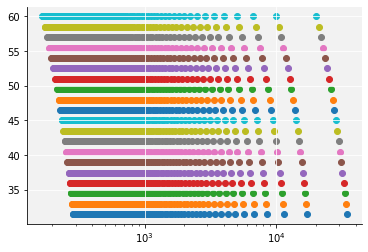

In [62]:
for l in wavelength.latitude[-20:]:
  plt.scatter(wavelength.sel(latitude=l), [l] * 121)
plt.xscale('log')

In [63]:
lead_times = np.array([6, 3*24, 5*24, 10*24]).astype('timedelta64[h]')

variable_levels_ylims = [
    ['geopotential', 500, (5e3, 2e10)],
    ['specific_humidity', 700, (1e-6, 1.1e-2)],
    ['u_component_of_wind', 850, (1e1, 1e6)],
    ['total_precipitation_6hr', None, (1e-6, 1e-2)]
]

lt_title = ['6h', '3d', '5d', '10d']

In [64]:
plt.rcParams['figure.facecolor'] = 'None'

In [65]:
fig, axs = plt.subplots(len(variable_levels_ylims), 4, figsize = (13, 3 * len(variable_levels_ylims)))
for j, (variable, level, ylim) in enumerate(variable_levels_ylims):
  for i, lead_time in enumerate(lead_times):
    ax = axs[j, i]
    for model, ds in spectra.items():
      try:
        if model == 'pangu' and level is not None:
          da = ds[variable + '_' + str(level)]
        else:
          da = ds[variable]
          if level:
            da = da.sel(level=level)
        if hasattr(da, 'prediction_timedelta'):
          da = da.sel(prediction_timedelta=lead_time)
        ax.plot(wavelength, da, label = labels[model],
                c=colors[model])
      except KeyError as e:
        print(e)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(ylim)
    if i >0: 
      ax.set_yticklabels([])
    else:
      ax.set_ylabel('Mean power')
    if j == len(variable_levels_ylims) - 1: 
      ax.set_xlabel('Mean wave length [km]')
    title = f'{long2short[variable]}{level if level else ""} - {lt_title[i]}'
    ax.set_title(title)
plt.subplots_adjust(left=0.07, right=0.98, bottom=0.05, top=0.95, hspace=0.3, wspace=0.05)
axs[0, 0].legend()
with fsspec.open(f'{SAVE_PATH}/spectra.png', 'wb', auto_mkdir=True) as f:
      fig.savefig(f, dpi=300)
      plt.close(fig)

"not all values found in index 'prediction_timedelta'. Try setting the `method` keyword argument (example: method='nearest')."
"not all values found in index 'prediction_timedelta'. Try setting the `method` keyword argument (example: method='nearest')."
"not all values found in index 'prediction_timedelta'. Try setting the `method` keyword argument (example: method='nearest')."
'total_precipitation_6hr'
'total_precipitation_6hr'
'total_precipitation_6hr'
'total_precipitation_6hr'
'total_precipitation_6hr'
'total_precipitation_6hr'
'total_precipitation_6hr'
'total_precipitation_6hr'


In [66]:

# from IPython.display import Image
# Image('./test.png')